In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gp
import shapely
import fiona
import requests
import re
import folium
import geopy.distance

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from folium import plugins
from folium.plugins import HeatMap
from bs4 import BeautifulSoup
from datetime import datetime

shp_file_name = "maps\Counties_Atlanta_Region\Counties_Atlanta_Region.shp"
zip_file_name = "Counties_Atlanta_Region.zip"
web_file_path = (
    "https://opendata.atlantaregional.com/datasets/GARC::counties-atlanta-region/about"
)

wiki_url = 'https://en.m.wikipedia.org/wiki/List_of_best-selling_hip_hop_albums_of_the_2010s_in_the_United_States'
table_id = 'wikitable sortable'

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5)

In [13]:
if os.path.isfile("atlcrime.csv"):
    filepath = "atlcrime.csv"
    print("loading from file")
else:
    filepath = "https://data.world/bryantahb/crime-in-atlanta-2009-2017/workspace/file?filename=atlcrime.csv"

    print("loading from the internet")

crime_data = pd.read_csv(filepath, parse_dates=[3], dayfirst=False)
print("done")

loading from file
done


My Data:
- A dataset which summates processed crime within Atlanta between the period 2009 - 2017.
- The given data begins its entries on the 1st of January 2009 and ends on 2nd of February 2017.
- The data has a high level of accuracy regarding specifics.
- Constructed from the data released by APD.
- Possibility of bias to instigate a false narrative.
- Data used for rappers created by RIAA.

WHY?

Understanding the stereotype that there is a strong correlation between the growing "glorification" of gang violence and "hip-hop" culture to increased crimes violent and non-violent.

- Atlanta, home to 21 Savage, Lil Baby, Migos and Future also where King Von's Shooting Occurred.

<img src = "21 Savage.jpg" width = 200 height = 200>

In [14]:
def gun_words():
    text = []

    gun_mask = np.array(Image.open(path.join("pngwing.com-removebg-preview.png")))

    for i in range (len(crime_data)):
        text.append(crime_data.crime[i])

    wordcloud = WordCloud(width=5000, height=5000, stopwords=STOPWORDS, background_color="white", mask=gun_mask, contour_width=2).generate(str(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Crime Popularity")
    plt.axis("off")
    plt.show()

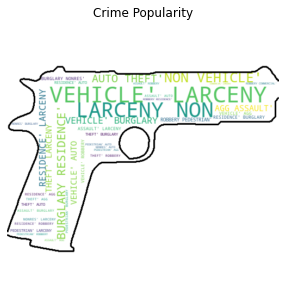

In [15]:
gun_words()

In [16]:
plt.rcParams['figure.figsize'] = (15, 7)

In [17]:
def monthly_crime():
    for name, df in crime_data.groupby("crime"):
        df.set_index('date').groupby(pd.Grouper(freq='M')).count().crime.plot(label=name)
    plt.legend()
    plt.ylabel("Crime Count")
    plt.xlabel("Year")

    plt.title("Crimes Commited Monthly between 2009-2017")

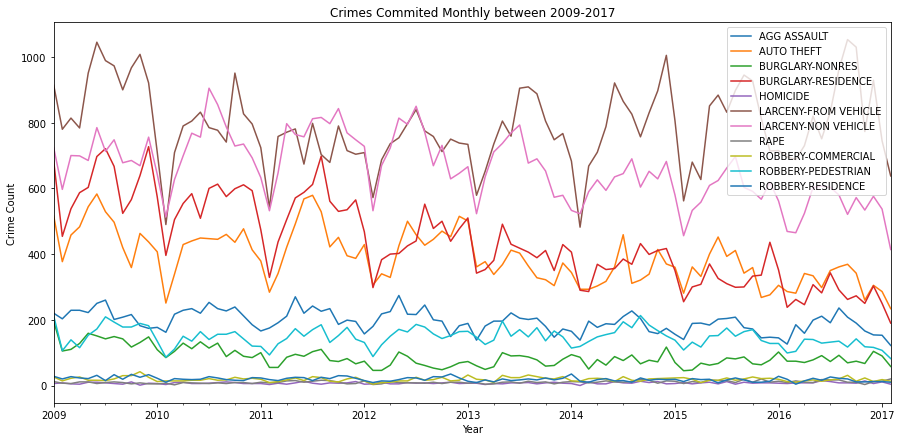

In [18]:
monthly_crime()

- This graph shows a common trend of a start of year decline in crime whilst thre are peaks in seaonal times such as thanksgiving due to events such as black friday, this is especially true for theft related crimes. 
- There is a gradual decline in crime from 2009 to 2017 in most of the crime categories.
- At the beginning of 2016 there is a significant change in the start of year drop, instead it plateaus and this is most likely due to the presidential elections.
- 2009 spike mid year matching the Fast and Furious release.

In [19]:
def less_incidents():
    for name, df in crime_data.groupby("crime"):
        if df.count().crime < 2000:
            df.set_index('date').groupby(pd.Grouper(freq='M')).count().crime.plot(label=name)
    plt.legend()
    plt.ylabel("Crime Count")
    plt.xlabel("Year")

    plt.title("Monthly Crimes with less than 2000 Incidents between 2009-2017")

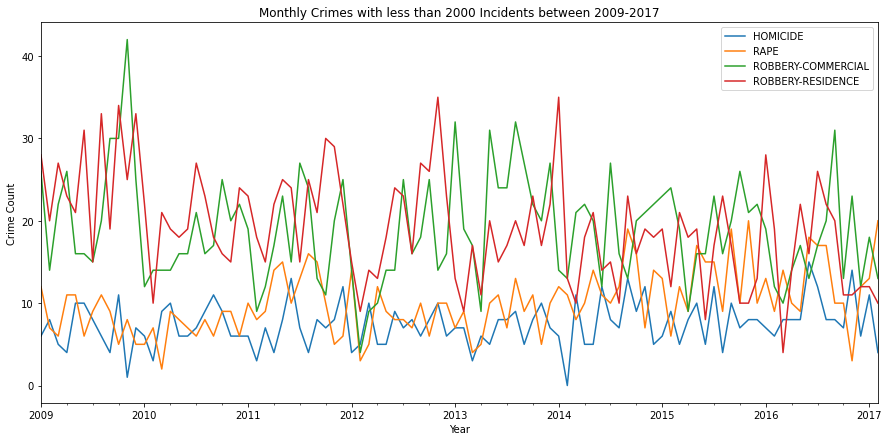

In [20]:
less_incidents()

- 2014 start of year dip in activities due to snowmagedon.
- Increased commercial robbery during thanksgiving period.
- Compared to the 2016 elections in 2012, the elections saw a lower crime start of year with a increase towards the election.

In [21]:
def homandrap():
    for name, df in crime_data.groupby("crime"):
        if df.count().crime < 1000:
            df.set_index('date').groupby(pd.Grouper(freq='M')).count().crime.plot(label=name)
    plt.legend()
    plt.ylabel("Crime Count")
    plt.xlabel("Year")

    plt.title("Increase of Homicde and Rape Over 2009-2017")

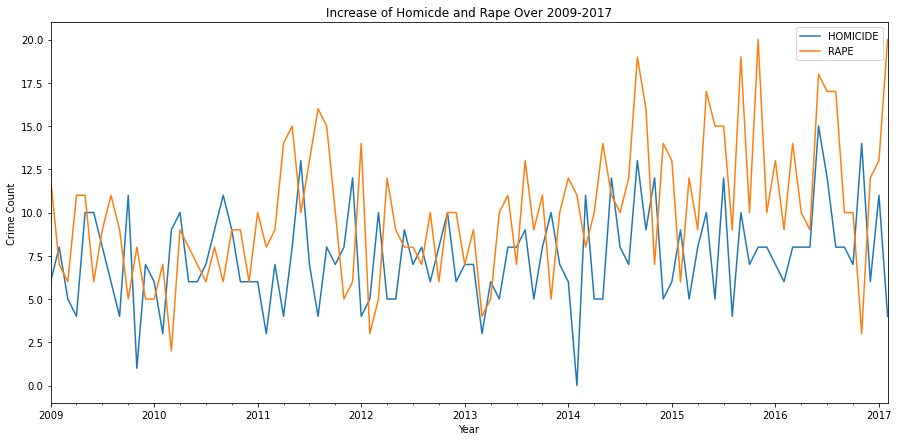

In [22]:
homandrap()

There has been a gradual increase in both rape and homicde caes over the period of time. Athough in regards to rap cases this may because an increase in reported rape cases allowing for the charge of more rapists. Whilst the increase in homicide rise is minimal.

In [53]:
def rap_popularity():
    plt.rcParams["figure.figsize"] = (10, 5)

    rappers = pd.read_html(wiki_url)[0]
    badboiz = ["T.I.", "Ludacris", "Lil Baby", "Future", "Gucci Mane", "Rae Sremmurd", "Big Boi", "Soulja Boy", "Migos", "Lil Yachty", "Young Thug"]
    atlanta_rappers = rappers[[x in badboiz for x in rappers.Artist]]

    atlanta_rappers.groupby("Artist").count().Certification.plot.barh()
    plt.xlabel("Amount Of Certification (Gold and Above)")
    plt.title("Amount of Atlanta Born Artist Certification")

    unit_values = ["500,000" , "1,000,000", "2,000,000"]
    units = atlanta_rappers[[type(x) is int for x in atlanta_rappers["Certified Units"]]]
    units[[unit_values in x for x in units["Certified Units"]]]

    new_list = atlanta_rappers.reset_index()
    num_list = []
    for i in range (0, len(atlanta_rappers)):
        num_list.append(int(re.sub("[^0-9]", "", str(new_list["Certified Units"][i]))))
    atlanta_rappers["NumCred"] = num_list

    ar = atlanta_rappers.groupby("Year").sum()


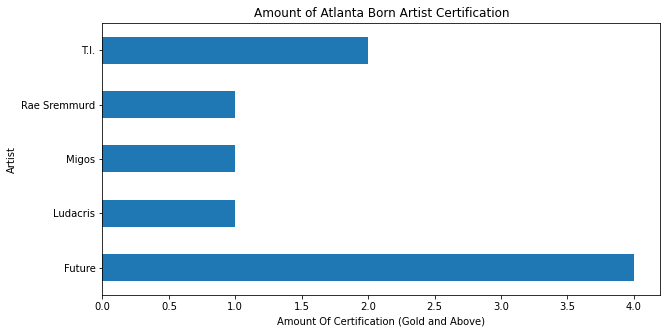

In [54]:
rap_popularity()

<AxesSubplot:xlabel='Year'>

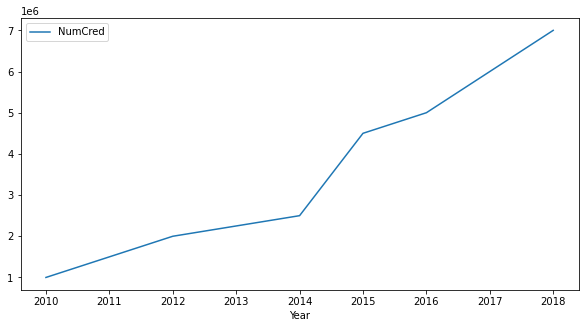

In [51]:
 ar.cumsum().plot()

In [92]:
def given_cert():
    for name, df in rappers.groupby("Certification"):
        df.groupby("Year").count().Certification.plot(label=name)
    plt.ylabel("Amount of Certifications")
    plt.xlabel("Year")

    plt.title("Certifications Given Per Year to Rap Artists")

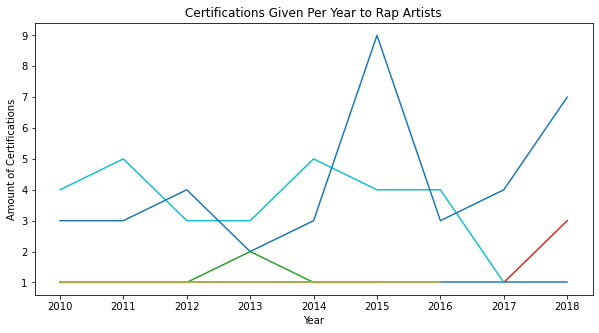

In [93]:
given_cert()

Realising the lack of correlation between the two sets of data. 
- Decreasing crime in supposedly crime ridden places.

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)

What is actually happening with crime in Atlanta?

- While homicide and rape levels remained relatively simmilar in 2009 and 2016. There is a large decrease in all other aspects.
- By 2016, the Atlanta government has seemed to half the Auto Theft.
- This has come from many reasons, the main being the upgrade of car components. Also the reduction of personally owned vehicles.

In [27]:
def year_compare():
    year_index_crime = crime_data.set_index(crime_data["date"])
    data_2009 = year_index_crime.loc["2009"]
    data_2016 = year_index_crime.loc["2016"]

    data_2009["crime"].value_counts().plot(kind="barh", color="red")
    data_2016["crime"].value_counts().plot(kind="barh")
    legend = plt.legend()
    legend.get_texts()[0].set_text("Crime Count in 2009")
    legend.get_texts()[1].set_text("Crime Count in 2016")
    plt.title("Comparison of amount of crime 2009 and 2016")

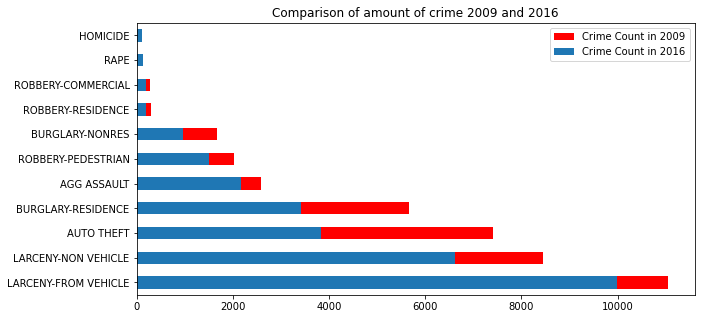

In [28]:
year_compare()

Text(0.5, 1.0, 'Locations of Crime in Atlanta')

C:\Users\anton\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


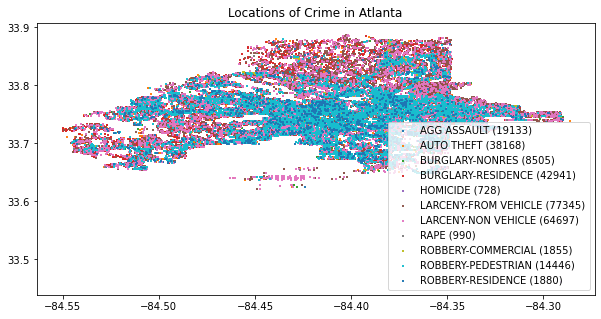

In [29]:
for name, df in crime_data.groupby("crime"):
    plt.scatter(df.long, df.lat, label=f"{name} ({df.shape[0]})", marker=",", s=1)
plt.legend()

plt.title("Locations of Crime in Atlanta")

- Locational scatterplot displays a trend with pedestrian robery converging towards the city centre. 
- A cluster of non vehicle larcenyrs down south.
- The features of the city are replicated by the locations of the crimes.
- Also a large cluster of home burglarys towards the south west of the map.
- The popular crimes are dependent on area, neighbourhoods have high amounts of home burglarys whilst pedestrian robbery is extremely common in the city centre.
 


In [30]:
def hexbin():
    plt.rcParams['figure.figsize'] = (10, 10)

    larceny = ["LARCENY-FROM VEHICLE", "LARCENY-NON VEHICLE"]

    larceny_list = crime_data[[x in larceny for x in crime_data.crime]]

    larceny_map = plt.scatter(larceny_list.long, larceny_list.lat)

    plt.hexbin(larceny_list.long, larceny_list.lat, gridsize=70, cmap="plasma")

    plt.title("Hexbin: Occourences of Larceny")


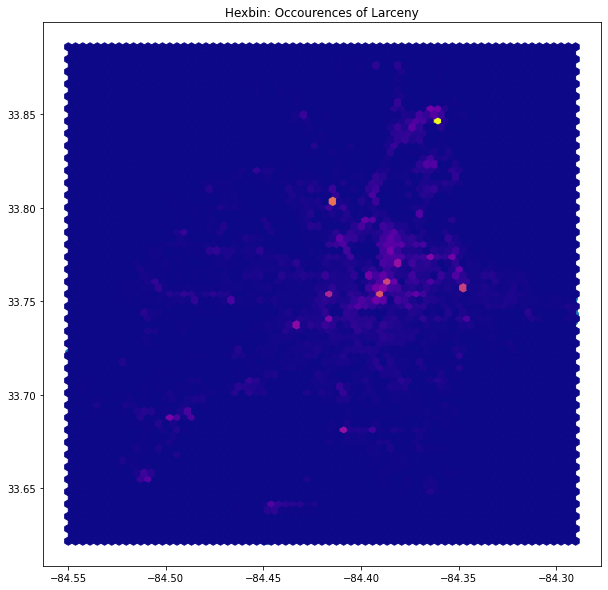

In [31]:
hexbin()

- Selecting just larceny related crimes we can see that the crimes follow the roads of the city.
- Uniting at a neucleus.
- Individual cluster zones at road intersections.

In [32]:
def unzip(zipped_file_path, put_it_here="."):
    import zipfile
    zip_file = zipfile.ZipFile(zipped_file_path, 'r')
    zip_file.extractall(put_it_here)
    zip_file.close()

In [33]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [2]:
def population_density():
    atlanta_map = gp.GeoDataFrame.from_file(shp_file_name)
    atlanta_map.plot(column="totpop10", legend = True, cmap='plasma', missing_kwds={'colour': 'lightgrey'})
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.title("Population density of atlanta")

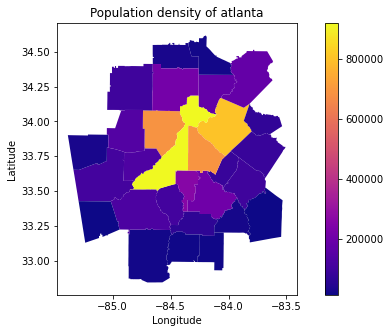

In [6]:
population_density()

In [35]:
def add_centroid(row):
    return row.geometry.centroid

def pi_chart():
    atlanta_map["centroid"] = atlanta_map.apply(add_centroid, axis=1)

    largest= 0
    location = 0
    for i in range (len(atlanta_map)):
        if atlanta_map.iloc[i].totpop10 > largest:
            location = i
            largest = atlanta_map.iloc[i].totpop10

    centre = atlanta_map.iloc[location].centroid

    list1 = []
    list2 = []
    list3 = []
    for i in range (200):
        if geopy.distance.distance((centre.x, centre.y), (crime_data.iloc[i].long, crime_data.iloc[i].lat)).m <= 10000:
            list1.append("l")
        elif geopy.distance.distance((centre.x, centre.y), (crime_data.iloc[i].long, crime_data.iloc[i].lat)).m <= 15000:
            list2.append("l")
        elif geopy.distance.distance((centre.x, centre.y), (crime_data.iloc[i].long, crime_data.iloc[i].lat)).m > 15000:
            list3.append("l")

    count1 = len(list1)
    count2 = len(list2)
    count3 = len(list3)

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    y_labs = [count1, count2, count3]
    x_labs = ["Under 10km", "Under 15km", "Over 15km"]

    plt.pie(y_labs, labels = x_labs)
    plt.show() 


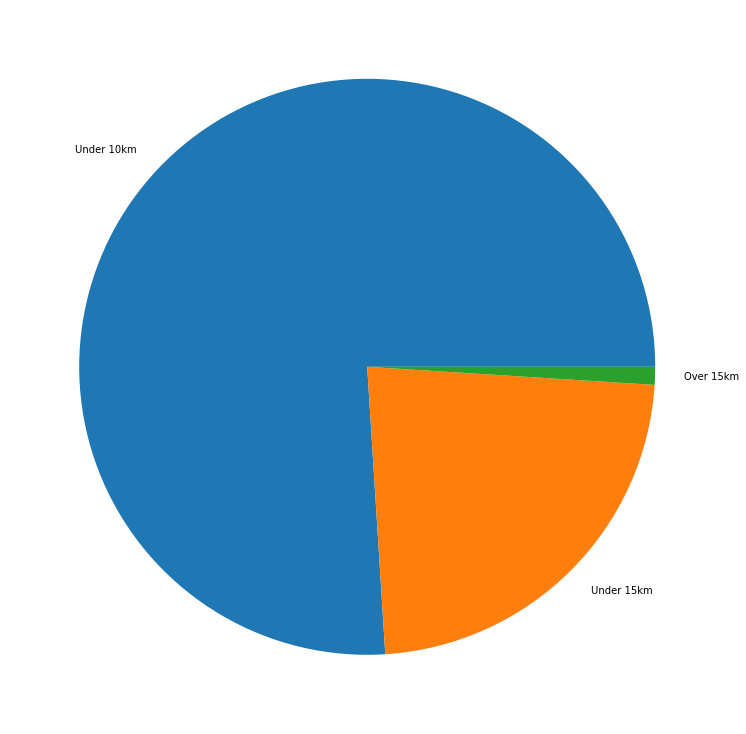

In [36]:
pi_chart()

- Crime possibility has an exponential growth towards city centers.
- A minimal amount of crime is commited 15km away for the inner city.

Text(0.5, 1.0, 'Transposing Crime Scatterplot on Population Density Graph')

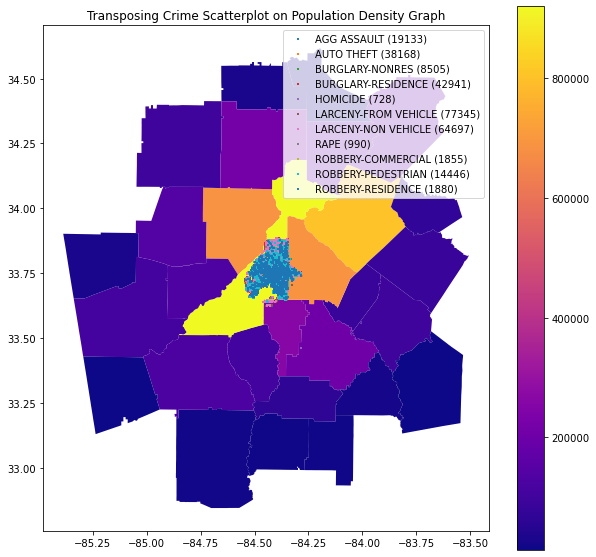

In [37]:
base = atlanta_map.plot(column="totpop10", legend = True, cmap='plasma', missing_kwds={'colour': 'lightgrey'})
for name, df in crime_data.groupby("crime"):
    plt.scatter(df.long, df.lat, label=f"{name} ({df.shape[0]})", marker=",", s=1)
plt.legend()
plt.title("Transposing Crime Scatterplot on Population Density Graph")